In [1]:
## Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
%matplotlib inline

In [2]:
## Creating own dataset
X,Y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

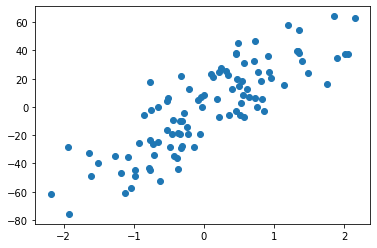

In [3]:
## Plot the points
plt.scatter(X,Y)

In [4]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [5]:
## Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [6]:
## Linear Regression
from sklearn.linear_model import LinearRegression
Linear_reg=LinearRegression()
Linear_reg.fit(X_train,Y_train)
Y_pred=Linear_reg.predict(X_test)

## Print Coefficient and Intercept
print("Coefficient=",Linear_reg.coef_)
print("Intercept=",Linear_reg.intercept_)

## Print metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print("Mean Absolute Error=",mae)
print("Mean Squared Error=",mse)
print("Root Mean Squared Error=",rmse)

## Print Score
score=r2_score(Y_test,Y_pred)
print("Score=",score)

Coefficient= [26.32664243]
Intercept= -2.026574926744717
Mean Absolute Error= 15.314816256456202
Mean Squared Error= 340.30278331801367
Root Mean Squared Error= 18.44729745296079
Score= 0.6186926408914154


In [7]:
## Ridge with alpha=10
from sklearn.linear_model import Ridge
Ridge_reg1=Ridge(alpha=10)
Ridge_reg1.fit(X_train,Y_train)
Y_pred=Ridge_reg1.predict(X_test)

## Print Coefficient and Intercept
print("Coefficient=",Ridge_reg1.coef_)
print("Intercept=",Ridge_reg1.intercept_)

## Print metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print("Mean Absolute Error=",mae)
print("Mean Squared Error=",mse)
print("Root Mean Squared Error=",rmse)

## Print Score
score=r2_score(Y_test,Y_pred)
print("Score=",score)


Coefficient= [23.40145994]
Intercept= -2.026574926744717
Mean Absolute Error= 15.1893733966171
Mean Squared Error= 339.9499653580328
Root Mean Squared Error= 18.437732109943262
Score= 0.6190879714357462


In [8]:
## Ridge with alpha=100
from sklearn.linear_model import Ridge
Ridge_reg2=Ridge(alpha=100)
Ridge_reg2.fit(X_train,Y_train)
Y_pred=Ridge_reg2.predict(X_test)

## Print Coefficient and Intercept
print("Coefficient=",Ridge_reg2.coef_)
print("Intercept=",Ridge_reg2.intercept_)

## Print metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print("Mean Absolute Error=",mae)
print("Mean Squared Error=",mse)
print("Root Mean Squared Error=",rmse)

## Print Score
score=r2_score(Y_test,Y_pred)
print("Score=",score)

Coefficient= [11.70072997]
Intercept= -2.026574926744717
Mean Absolute Error= 19.102122785289787
Mean Squared Error= 505.59017533138103
Root Mean Squared Error= 22.485332448762705
Score= 0.43348904564586854


Coefficient is decresing with alpha value increase and thus the overfiiting caused by linear regression is also reduced with ridge

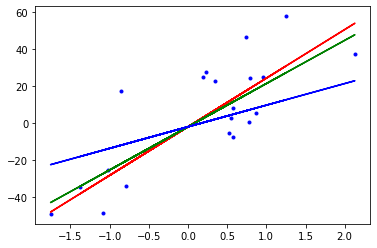

In [9]:
## Plotting Linear Regression,Ridge with alpha 10 and Ridge with alpha 100 lines
plt.plot(X_test,Y_test,'b.')
plt.plot(X_test,Linear_reg.predict(X_test),color='r',label='alpha 0/Linear Regression')
plt.plot(X_test,Ridge_reg1.predict(X_test),color='g',label='alpha 10')
plt.plot(X_test,Ridge_reg2.predict(X_test),color='b',label='alpha 100')

The red line is linear  Regression line i.e. with alpha 0 --> Without penalty term--> Overfitted Line----------------
The Green Line is neutral line -----------------------------------------
The Blue line is with alpha 100--> Underfitted line

In [10]:
class Manual_Ridge:

    def __init__(self,alpha=0.1):
        self.alpha=alpha
        self.m=None
        self.b=None

    def fit(self,X_train,Y_train):
        num=0
        den=0
        for i in range(X_train.shape[0]):
            num=num+((Y_train[i]-np.mean(Y_train))*(X_train[i]-np.mean(X_train)))
            den=den+((X_train[i]-np.mean(X_train))*(X_train[i]-np.mean(X_train)))
        
        m=num/(den+self.alpha)
        b=np.mean(Y_train)-(m*np.mean(X_train))
        print("Coef:",m)
        print("Intercept:",b)

    def predict(self,X_test):
        y_pred= (self.m* X_test)+self.b
        print(y_pred)


In [11]:
Ridge1=Manual_Ridge(alpha=0)
Ridge1.fit(X_train,Y_train)

Coef: [26.32664243]
Intercept: [-2.02657493]


In [12]:
Ridge1=Manual_Ridge(alpha=10)
Ridge1.fit(X_train,Y_train)

Coef: [23.40145994]
Intercept: [-2.02657493]


In [13]:
Ridge1=Manual_Ridge(alpha=100)
Ridge1.fit(X_train,Y_train)

Coef: [11.70072997]
Intercept: [-2.02657493]


The output with ridge default function and its output from scartch coding is same

### Key Understandings

1. How coefficients are getting affected
--> As we will increase the lambda value the coefficients will shrink ,they may reach 0 but will never be 0,they will have some value

In [14]:
## Import libraries
from sklearn.datasets import load_diabetes

In [15]:
df_diabetes=load_diabetes()
df_diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [17]:
## Create Dataframe
data_diabetes=pd.DataFrame(df_diabetes.data,columns=df_diabetes.feature_names)
data_diabetes['Target']=df_diabetes.target
data_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [21]:
## Independent and dependent feature
X=data_diabetes.iloc[:,:-1]
Y=data_diabetes.iloc[:,-1]
Y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: Target, dtype: float64

In [22]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [23]:
## import ridge and metrics
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [25]:
coef=[]
r2_scores=[]

for  i in [0,10,100,1000]:
    ridge_reg=Ridge(alpha=i)
    ridge_reg.fit(X_train,Y_train)

    coef.append(ridge_reg.coef_)
    y_pred=ridge_reg.predict(X_test)
    r2_scores.append(r2_score(Y_test,y_pred))

print("Coefficients:",coef)
print("R2 Scores:",r2_scores)

Coefficients: [array([  47.74968054, -241.99090728,  531.97106288,  381.56286182,
       -918.50290455,  508.25778252,  116.95016447,  269.4923028 ,
        695.80811712,   26.32458203]), array([ 17.83763181,  -2.01927742,  60.23960272,  45.07216792,
        13.96326368,  10.03597889, -38.74742127,  39.88316246,
        53.32993877,  34.86553873]), array([ 2.29087373,  0.12180137,  7.03313594,  5.32227911,  2.14334872,
        1.71725212, -4.69035801,  5.1042043 ,  6.44026659,  4.39370011]), array([ 0.23565768,  0.01658233,  0.71591231,  0.54244862,  0.22437816,
        0.18141026, -0.47938113,  0.52493004,  0.65812541,  0.45096739])]
R2 Scores: [0.4849058889476755, 0.1564233282092311, 0.009084996738048523, -0.011622918291190443]


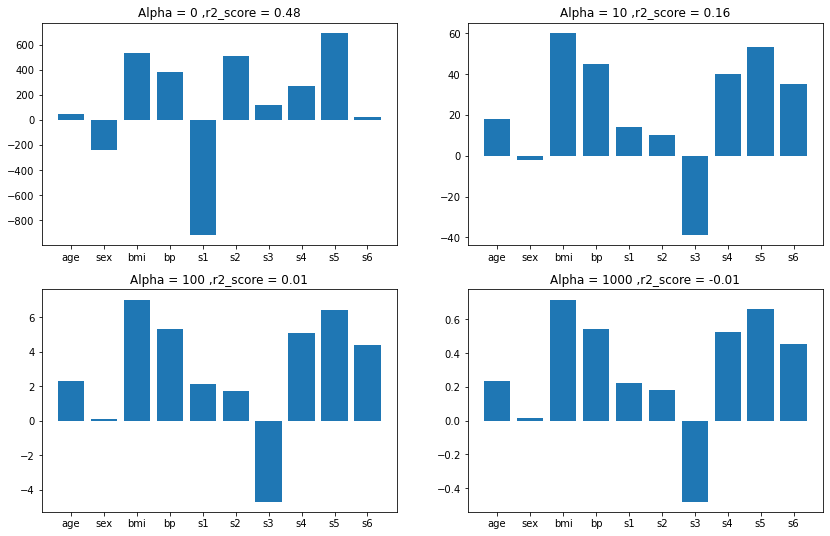

In [27]:
## Plotting the graphs
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(df_diabetes.feature_names,coef[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(df_diabetes.feature_names,coef[1])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(df_diabetes.feature_names,coef[2])
plt.title('Alpha = 100 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(df_diabetes.feature_names,coef[3])
plt.title('Alpha = 1000 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()


As the alpha is increasing coefficients are decreasing drastically.
But if feature- sex is observed then it is coming near to 0 but with subsequest alpha increase it is not becoming 0.

2. Higher values are impacted more
The variables which are contributing the most in Y calculation have high coefficients value, so when we increase lambda value then these high value coeeficients will decrease the most

In [39]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,Y_train)
    
    coefs.append(reg.coef_.tolist())

In [40]:
coef_arr=np.array(coefs)

In [42]:
coef_df=pd.DataFrame(coef_arr,columns=df_diabetes.feature_names)
coef_df['alpha']=alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,47.749681,-241.990907,531.971063,381.562862,-918.502905,508.257783,116.950164,269.492303,695.808117,26.324582
0.0001,47.820710,-241.915766,532.149458,381.436282,-906.903126,499.204878,111.782965,267.865031,691.352713,26.452445
0.0010,48.381664,-241.272301,533.490847,380.390465,-815.288463,427.754704,71.002884,255.003655,656.134684,27.504959
0.0100,50.760628,-236.231352,536.041371,373.825241,-426.935340,127.149873,-100.431910,200.100975,505.469879,33.912978
0.1000,52.866087,-200.508670,493.959172,339.279834,-118.063006,-80.910795,-215.280522,153.414567,365.682045,62.422629
1.0000,50.552012,-67.722224,278.301228,197.622638,-6.245836,-26.226726,-151.394331,120.323359,215.854463,101.755774
10.0000,17.837632,-2.019277,60.239603,45.072168,13.963264,10.035979,-38.747421,39.883162,53.329939,34.865539
100.0000,2.290874,0.121801,7.033136,5.322279,2.143349,1.717252,-4.690358,5.104204,6.440267,4.393700
1000.0000,0.235658,0.016582,0.715912,0.542449,0.224378,0.181410,-0.479381,0.524930,0.658125,0.450967


The variables with highest coefficent values are decreasing with huge amount

3. Bias Variance Tradeoff

 In overfitting situation if we keep lambda value very low then as this is overfitting scenario with low lambda its bias will be very low but the variance would be very high.
 When will increase lambda value then bias will start increasing but variance will decrease and if we increase lambda too much then both bias and variance will be high..
 so have to find such a middle value for lambda where bias and variance both should be less.

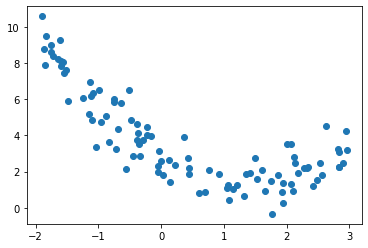

In [46]:
## Generate data
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [47]:
## Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [48]:
## Polynomial with degree 15 and scaling
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [ ]:
!pip install mlxtend

In [53]:
## mlxtend.evaluate have bias_variance_decomp function which calculates bias and variance for alpha values
from mlxtend.evaluate import bias_variance_decomp

## Generating 100 alpha values between 0 and 20
alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

## For each alpha get bias,variance and loss and append them in list
for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

In [57]:
bias_df=pd.DataFrame(bias)
bias_df['alpha']=alphas
bias_df.set_index('alpha')

,0
alpha,
0.000000,1.100759
0.303030,0.601513
0.606061,0.603074
0.909091,0.609249
1.212121,0.615878
...,...
28.787879,0.716920
29.090909,0.717593
29.393939,0.718264


In [ ]:
4. Impact of lambda on loss function

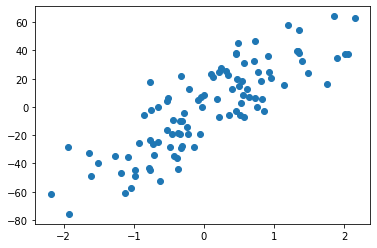

In [59]:
## Create Dataset
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

In [63]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [64]:
## Apply simple linear regression

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,Y_train)
print(reg.coef_)
print(reg.intercept_)

[28.06428544]
-2.4682487786594804


In [67]:
## Calculate loss and prediction    
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.46)**2) + alpha*m*m

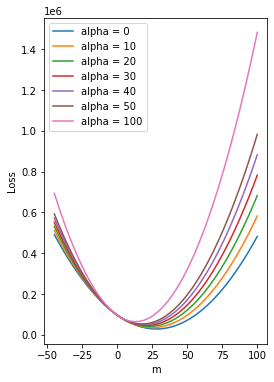

In [69]:
## import mean squared error and calculate loss for ridge
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('m')
plt.ylabel('Loss')
plt.show()

As alpha is increasing loss is also increasing...with simple linear regression we got m near to 28 and intercept near to 2.27
when alpha is increasing global minima is shifting towards 0 on x-axis i.e. m is decreasing and loss is increasing with alpha..i.e. global minima is shifting upwards and leftwords i.e. loss is increasing and m is decreasing